In [1]:
#  Import Necessary Libraries

import os
import shutil
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-12-12 02:20:18.001895: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-12 02:20:18.801482: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
# # 设置参数
# import random

# data_dir = r'E:\MV\archive'
# train_dir = r'/home/featurize/data/new_split_dataset/train'
# val_dir = r'/home/featurize/data/new_split_dataset/validation'
# test_dir = r'/home/featurize/data/new_split_dataset/test'
# argument = r'/home/featurize/data/new_split_dataset/argument'

# class_names = ['ants', 'bees', 'beetle', 'catterpillar', 'earthworms', 'earwig',
#                'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil']

# # 创建目录
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # 数据增强参数
# datagen = ImageDataGenerator(
#     shear_range=0.2,
#     zoom_range=0.2,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     rotation_range=30,
#     horizontal_flip=True, fill_mode='nearest')

# for class_name in class_names:

#     class_images = os.listdir(os.path.join(data_dir, class_name))
#     random.shuffle(class_images)

#     train_images, test_val_images = train_test_split(class_images, test_size=0.3, random_state=42)
#     val_images, test_images = train_test_split(test_val_images, test_size=0.5, random_state=42)

#     for image in train_images:
#         src = os.path.join(data_dir, class_name, image)
#         dst = os.path.join(train_dir, class_name, image)
#         os.makedirs(os.path.dirname(dst), exist_ok=True)
#         shutil.copy(src, dst)
#         try:

#             # 加载图像并将其转换为数组
#             img = np.expand_dims(plt.imread(src), axis=0)

#             prefix = image.split('.')[0]
#             # 生成增强后的图像
#             augmented_images = datagen.flow(img, batch_size=1, save_to_dir=os.path.join(train_dir, class_name),
#                                             save_prefix=prefix+'argu', save_format='jpg')

#             # 迭代生成并保存增强后的图像
#             for i in range(5):  # 生成五倍数量的图像
#                 next(augmented_images)

#         except:
#             print(image)

#     for image in val_images:
#         src = os.path.join(data_dir, class_name, image)
#         dst = os.path.join(val_dir, class_name, image)
#         os.makedirs(os.path.dirname(dst), exist_ok=True)
#         shutil.copy(src, dst)
#     for image in test_images:
#         src = os.path.join(data_dir, class_name, image)
#         dst = os.path.join(test_dir, class_name, image)
#         os.makedirs(os.path.dirname(dst), exist_ok=True)
#         shutil.copy(src, dst)

In [2]:

# train_dir = r'/home/featurize/data/new_split_dataset/train'
# val_dir = r'/home/featurize/data/new_split_dataset/validation'
# test_dir = r'/home/featurize/data/new_split_dataset/test'


Number of images per class in training dataset:
beetle: 1456
earthworms: 1130
catterpillar: 1519
moth: 1739
slug: 1368
grasshopper: 1697
bees: 1400
snail: 1750
wasp: 1743
earwig: 1631
ants: 1396
weevil: 1697


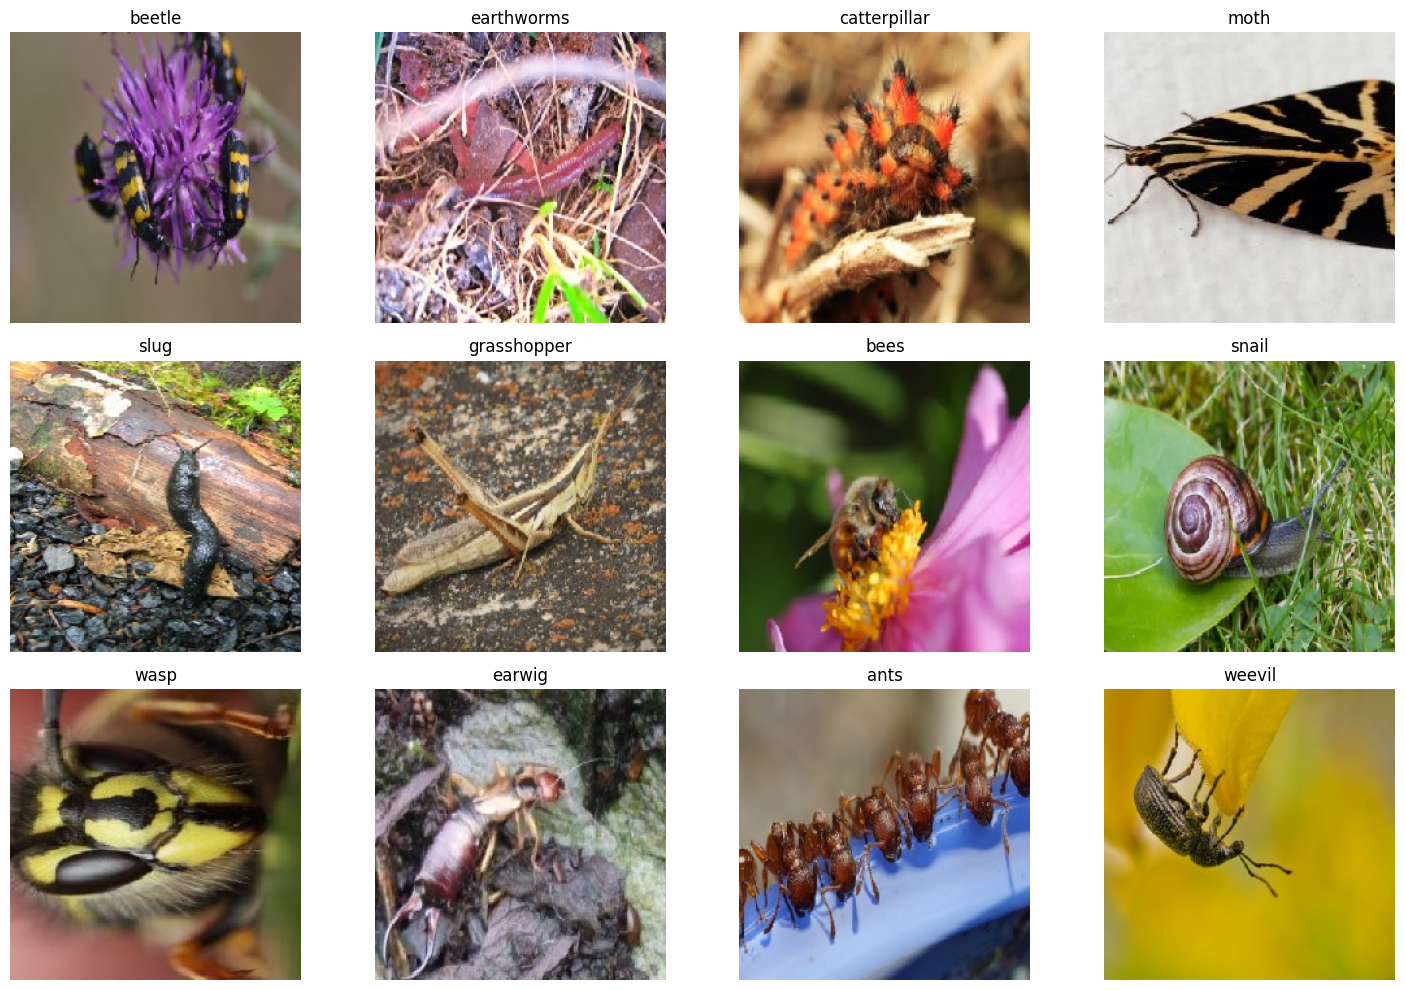

In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import os

# Define directories
train_dir = r'/home/featurize/data/new_split_dataset/train'
val_dir = r'/home/featurize/data/new_split_dataset/validation'
test_dir = r'/home/featurize/data/new_split_dataset/test'

# Function to count images per class in a directory
def count_images(directory):
    class_counts = {}
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            class_counts[subdir] = len(os.listdir(subdir_path))
    return class_counts

# Count images in the training directory
train_class_counts = count_images(train_dir)

# Display the count for each class
print("Number of images per class in training dataset:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")

# Function to display an image from each class with a specific layout (4 images per row, 3 rows)
def display_sample_images_updated(directory, class_counts):
    num_rows = 3
    num_cols = 4
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    class_names = list(class_counts.keys())
    for i in range(num_rows * num_cols):
        if i < len(class_names):
            class_name = class_names[i]
            class_dir = os.path.join(directory, class_name)
            sample_image = os.listdir(class_dir)[0]  # Get the first image in each class
            img_path = os.path.join(class_dir, sample_image)
            img = load_img(img_path, target_size=(224, 224))
            axes[i].imshow(img)
            axes[i].set_title(class_name)
            axes[i].axis('off')
        else:
            axes[i].axis('off')  # Turn off axis for empty subplots

    plt.tight_layout()
    plt.show()

# Display sample images with the new layout
display_sample_images_updated(train_dir, train_class_counts)


In [4]:
#Data Preprocessing

img_width, img_height = 224, 224  # Resize dimensions
batch_size = 32

# Training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Validation and test data should not be augmented
val_test_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',shuffle=True)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',shuffle=False)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)


Found 18526 images belonging to 12 classes.
Found 3966 images belonging to 12 classes.
Found 3979 images belonging to 12 classes.


In [5]:
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

In [6]:
print('trainset number', len(train_generator))
print('categories number', len(train_generator.class_indices.keys()))
print('categories name', train_generator.class_indices.keys())

trainset number 579
categories number 12
categories name dict_keys(['ants', 'bees', 'beetle', 'catterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil'])


In [7]:
print('validationset number', len(validation_generator))
print('categories number', len(validation_generator.class_indices.keys()))
print('categories name', validation_generator.class_indices.keys())

validationset number 124
categories number 12
categories name dict_keys(['ants', 'bees', 'beetle', 'catterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil'])


In [8]:
print('testset number', len(test_generator))
print('categories number', len(test_generator.class_indices.keys()))
print('categories name', test_generator.class_indices.keys())

testset number 125
categories number 12
categories name dict_keys(['ants', 'bees', 'beetle', 'catterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil'])


In [9]:
class_names = train_generator.class_indices
n_class = len(class_names)

In [10]:
class_names

{'ants': 0,
 'bees': 1,
 'beetle': 2,
 'catterpillar': 3,
 'earthworms': 4,
 'earwig': 5,
 'grasshopper': 6,
 'moth': 7,
 'slug': 8,
 'snail': 9,
 'wasp': 10,
 'weevil': 11}

In [11]:
idx_to_labels = {y:x for x,y in train_generator.class_indices.items()}

In [12]:
idx_to_labels

{0: 'ants',
 1: 'bees',
 2: 'beetle',
 3: 'catterpillar',
 4: 'earthworms',
 5: 'earwig',
 6: 'grasshopper',
 7: 'moth',
 8: 'slug',
 9: 'snail',
 10: 'wasp',
 11: 'weevil'}

In [63]:
import tensorflow as tf
#Model_1
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense, MaxPooling2D

class EcaLayer(tf.keras.layers.Layer):
    def __init__(self, gamma=2, **kwargs):
        super(EcaLayer, self).__init__(**kwargs)
        self.gamma = gamma

    def build(self, input_shape):
        channels = input_shape[-1]
        self.avg_pool = GlobalAveragePooling2D()
        self.reshape = tf.keras.layers.Reshape((1, 1, channels))
        self.conv = Conv2D(1, kernel_size=1, use_bias=False, kernel_initializer='he_normal', activation='sigmoid')

    def call(self, inputs):
        x = self.avg_pool(inputs)
        x = self.reshape(x)
        x = self.conv(x)
        return inputs * (1 + self.gamma * x)

def residual_block(inputs, filters, eca=True, stride=1):
    x = Conv2D(filters, (1, 1), strides=(stride, stride))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(filters * 4, (1, 1))(x)
    x = BatchNormalization()(x)
    
    if eca:
        x = EcaLayer()(x)
    
    if stride != 1 or inputs.shape[-1] != filters * 4:
        residual = Conv2D(filters * 4, (1, 1), strides=(stride, stride))(inputs)
        residual = BatchNormalization()(residual)
    else:
        residual = inputs
    
    x = Add()([x, residual])
    x = ReLU()(x)
    
    return x

def reseca(input_shape=(224, 224, 3), num_classes=12):
    inputs = Input(shape=input_shape)
    
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = residual_block(x, 64, stride=1)
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)
    x = residual_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, x, name='res_eca')
    return model


model1 = reseca()
model1.summary()

Model: "res_eca"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_106 (Conv2D)         (None, 112, 112, 64)         9472      ['input_5[0][0]']             
                                                                                                  
 batch_normalization_136 (B  (None, 112, 112, 64)         256       ['conv2d_106[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 re_lu_102 (ReLU)            (None, 112, 112, 64)         0         ['batch_normalization_13

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, DepthwiseConv2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
#Model_2
def SEBlock(inputs, reduction_ratio=16):
    channels = inputs.shape[-1]

    x = GlobalAveragePooling2D()(inputs)
    x = Dense(channels // reduction_ratio, activation='relu')(x)
    x = Dense(channels, activation='sigmoid')(x)

    x = tf.keras.layers.Reshape((1, 1, channels))(x)
    scaled_inputs = tf.keras.layers.Multiply()([inputs, x])

    return scaled_inputs

def EffBlock(inputs, filters, expansion_factor=6, kernel_size=3, stride=1, use_se=True):

    x = Conv2D(expansion_factor * filters, 1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = DepthwiseConv2D(kernel_size, stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    if use_se:
        x = SEBlock(x)

    x = Conv2D(filters, 1, padding='same')(x)
    x = BatchNormalization()(x)

    if stride == 1 and filters == inputs.shape[-1]:
        x = tf.keras.layers.Add()([x, inputs])

    return x

def effSE(input_shape=(224,224, 3), num_classes=12):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, 3, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = EffBlock(x, 16, kernel_size=3, use_se=False)
    x = EffBlock(x, 24, stride=2)
    x = EffBlock(x, 24)

    x = EffBlock(x, 40, stride=2)
    x = EffBlock(x, 40)

    x = EffBlock(x, 80, stride=2)
    x = EffBlock(x, 80)
    x = EffBlock(x, 80)

    x = EffBlock(x, 112, stride=1)
    x = EffBlock(x, 112)
    x = EffBlock(x, 112)

    x = EffBlock(x, 192, stride=2)
    x = EffBlock(x, 192)
    x = EffBlock(x, 192)

    x = EffBlock(x, 320, stride=1)

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, x, name='effse')
    return model
model2 = effSE()
model2.summary()

Model: "effse"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_75 (Conv2D)          (None, 112, 112, 32)         896       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_90 (Ba  (None, 112, 112, 32)         128       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_71 (ReLU)             (None, 112, 112, 32)         0         ['batch_normalization_90[0

In [64]:
from keras.models import Model
from keras.layers import Input, average

#Ensemble_model

# inputlayer
input_layer = Input(shape=(224, 224, 3))

output_1 = model1(input_layer)
output_2 = model2(input_layer)

average_output = average([output_1, output_2])

ensemble_model = Model(inputs=input_layer, outputs=average_output)

ensemble_model.summary()

Model: "model_56"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 res_eca (Functional)        (None, 12)                   2109889   ['input_6[0][0]']             
                                                          2                                       
                                                                                                  
 effse (Functional)          (None, 12)                   4352276   ['input_6[0][0]']             
                                                                                                  
 average_1 (Average)         (None, 12)                   0         ['res_eca[0][0]',      

In [16]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import register_keras_serializable
#custom loss function
def custom_categorical_crossentropy(y_true, y_pred, label_smoothing=0.1, num_classes=12):
    epsilon = tf.keras.backend.epsilon()
    y_true_smoothed = y_true * (1.0 - label_smoothing) + label_smoothing / num_classes
    y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
    cce = -tf.reduce_sum(y_true_smoothed * tf.math.log(y_pred), axis=-1)
    return tf.reduce_mean(cce)


In [17]:
import tensorflow as tf
#custom accuracy function
def accuracy(y_true, y_pred):
    correct_predictions = tf.equal(tf.argmax(y_true, axis=-1), tf.argmax(y_pred, axis=-1))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    return accuracy 

In [18]:
from keras.optimizers import Adam
# learning rate adjustment strategy
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
         initial_learning_rate=0.001,
         decay_steps=10000,
         decay_rate=0.9
     )
ensemble_model.compile(optimizer=Adam(learning_rate=lr_schedule),
                       loss=custom_categorical_crossentropy,
                       metrics=accuracy)

In [19]:
epochs = 150  # 这是训练迭代次数，根据需要可以增加或减少
steps_per_epoch = train_generator.samples // batch_size  # 每个epoch中的训练步数
validation_steps = validation_generator.samples // batch_size  # 每个epoch中的验证步数

In [20]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the ModelCheckpoint callback
# checkpoint_filepath = '/home/featurize/work/1model_weights.h5'     # 从头训练了200次得到的训练权重
# # ensemble_model.load_weights(checkpoint_filepath,by_name=True)
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',  # You can choose a different metric like 'val_loss'
#     mode='max',  # or 'min' depending on the monitored metric
#     save_best_only=True
# )
# callbacks=[model_checkpoint_callback]

In [21]:
# Train the model
history=ensemble_model.fit(train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps)

Epoch 1/150


2023-12-12 02:20:58.586546: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-12-12 02:21:00.281469: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-12 02:21:01.832137: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1f7cb5f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-12 02:21:01.832194: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2023-12-12 02:21:01.840744: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-12 02:21:02.010002: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


578/578 [==============================] - 290s 367ms/step - loss: 2.2949 - accuracy: 0.2479 - val_loss: 3.3134 - val_accuracy: 0.0757
Epoch 2/150
578/578 [==============================] - 206s 356ms/step - loss: 2.0885 - accuracy: 0.3431 - val_loss: 2.5021 - val_accuracy: 0.2261
Epoch 3/150
578/578 [==============================] - 207s 357ms/step - loss: 1.9547 - accuracy: 0.4122 - val_loss: 2.4500 - val_accuracy: 0.2515
Epoch 4/150
578/578 [==============================] - 205s 355ms/step - loss: 1.8859 - accuracy: 0.4438 - val_loss: 2.5004 - val_accuracy: 0.2729
Epoch 5/150
578/578 [==============================] - 209s 362ms/step - loss: 1.8175 - accuracy: 0.4738 - val_loss: 2.2242 - val_accuracy: 0.3900
Epoch 6/150
578/578 [==============================] - 202s 349ms/step - loss: 1.7606 - accuracy: 0.5000 - val_loss: 2.0734 - val_accuracy: 0.3941
Epoch 7/150
578/578 [==============================] - 205s 355ms/step - loss: 1.6809 - accuracy: 0.5477 - val_loss: 1.9024 - val_

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



578/578 [==============================] - 206s 356ms/step - loss: 0.9250 - accuracy: 0.9189 - val_loss: 0.9833 - val_accuracy: 0.8892
Epoch 57/150
578/578 [==============================] - 207s 357ms/step - loss: 0.9074 - accuracy: 0.9268 - val_loss: 0.9991 - val_accuracy: 0.8801
Epoch 58/150
578/578 [==============================] - 204s 352ms/step - loss: 0.9074 - accuracy: 0.9252 - val_loss: 0.9873 - val_accuracy: 0.8816
Epoch 59/150
578/578 [==============================] - 207s 359ms/step - loss: 0.8963 - accuracy: 0.9266 - val_loss: 0.9865 - val_accuracy: 0.8808
Epoch 60/150
578/578 [==============================] - 204s 352ms/step - loss: 0.8917 - accuracy: 0.9297 - val_loss: 0.9763 - val_accuracy: 0.8869
Epoch 61/150
243/578 [===========>..................] - ETA: 1:38 - loss: 0.8818 - accuracy: 0.9343

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



578/578 [==============================] - 202s 349ms/step - loss: 0.8202 - accuracy: 0.9457 - val_loss: 0.8764 - val_accuracy: 0.9164
Epoch 74/150
578/578 [==============================] - 207s 357ms/step - loss: 0.8106 - accuracy: 0.9503 - val_loss: 0.8881 - val_accuracy: 0.9083
Epoch 75/150
578/578 [==============================] - 203s 351ms/step - loss: 0.8141 - accuracy: 0.9468 - val_loss: 0.8677 - val_accuracy: 0.9172
Epoch 76/150
578/578 [==============================] - 204s 352ms/step - loss: 0.8042 - accuracy: 0.9496 - val_loss: 0.8807 - val_accuracy: 0.9174
Epoch 77/150
578/578 [==============================] - 203s 350ms/step - loss: 0.7997 - accuracy: 0.9513 - val_loss: 0.8544 - val_accuracy: 0.9294
Epoch 78/150
578/578 [==============================] - 204s 352ms/step - loss: 0.7904 - accuracy: 0.9519 - val_loss: 0.8859 - val_accuracy: 0.9096
Epoch 79/150
 67/578 [==>...........................] - ETA: 2:31 - loss: 0.8007 - accuracy: 0.9496

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



578/578 [==============================] - 204s 353ms/step - loss: 0.7375 - accuracy: 0.9619 - val_loss: 0.7881 - val_accuracy: 0.9342
Epoch 93/150
578/578 [==============================] - 205s 355ms/step - loss: 0.7406 - accuracy: 0.9610 - val_loss: 0.7774 - val_accuracy: 0.9436
Epoch 94/150
578/578 [==============================] - 205s 354ms/step - loss: 0.7254 - accuracy: 0.9657 - val_loss: 0.8269 - val_accuracy: 0.9258
Epoch 95/150
578/578 [==============================] - 202s 349ms/step - loss: 0.7236 - accuracy: 0.9652 - val_loss: 0.7784 - val_accuracy: 0.9324
Epoch 96/150
578/578 [==============================] - 206s 356ms/step - loss: 0.7326 - accuracy: 0.9617 - val_loss: 0.7872 - val_accuracy: 0.9378
Epoch 97/150
303/578 [==============>...............] - ETA: 1:19 - loss: 0.7148 - accuracy: 0.9676

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



578/578 [==============================] - 208s 359ms/step - loss: 0.7190 - accuracy: 0.9652 - val_loss: 0.7546 - val_accuracy: 0.9512
Epoch 99/150
578/578 [==============================] - 207s 358ms/step - loss: 0.7102 - accuracy: 0.9697 - val_loss: 0.7703 - val_accuracy: 0.9507
Epoch 100/150
578/578 [==============================] - 204s 353ms/step - loss: 0.7061 - accuracy: 0.9700 - val_loss: 0.7547 - val_accuracy: 0.9499
Epoch 101/150
578/578 [==============================] - 205s 354ms/step - loss: 0.7062 - accuracy: 0.9687 - val_loss: 0.7544 - val_accuracy: 0.9466
Epoch 102/150
578/578 [==============================] - 205s 354ms/step - loss: 0.7020 - accuracy: 0.9704 - val_loss: 0.7541 - val_accuracy: 0.9449
Epoch 103/150
578/578 [==============================] - 206s 356ms/step - loss: 0.7022 - accuracy: 0.9676 - val_loss: 0.7434 - val_accuracy: 0.9502
Epoch 104/150
578/578 [==============================] - 205s 354ms/step - loss: 0.6986 - accuracy: 0.9683 - val_loss: 0.

In [22]:
# # 继续训练模型
# additional_epochs = 50
# total_epochs = 100 + additional_epochs

# latest_history = ensemble_model.fit(
#     train_generator,
#     steps_per_epoch=steps_per_epoch,
#     epochs=total_epochs,  # 更新总的训练轮数
#     validation_data=validation_generator,
#     validation_steps=validation_steps,
#     initial_epoch=100  # 从100开始，因为已经训练了100个epoch
# )


In [23]:
test_loss, test_accuracy = ensemble_model.evaluate(test_generator)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

125/125 [==============================] - 37s 293ms/step - loss: 0.6592 - accuracy: 0.9522
Test Loss:  0.6592225432395935
Test Accuracy:  0.95224928855896


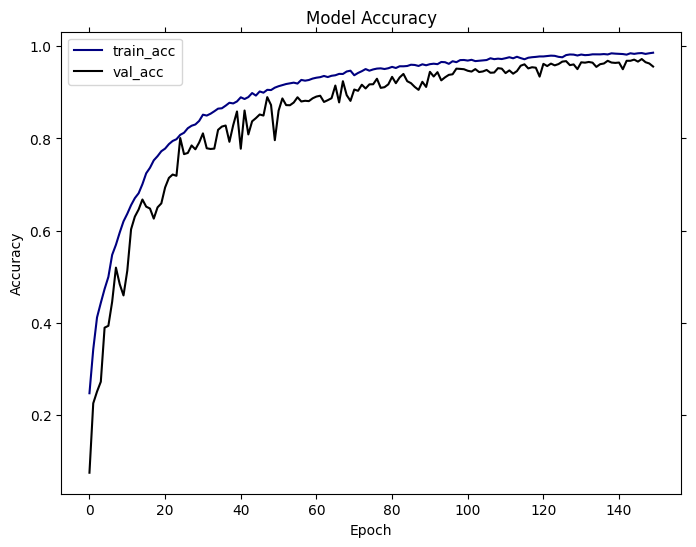

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='train_acc', color='navy')
plt.plot(history.history['val_accuracy'], label='val_acc',color='black')
ax = plt.gca()
ax.tick_params(right=True,top=True)
# ax.spines['bottom'].set_linewidth(1.7)
# ax.spines['left'].set_linewidth(1.7)
# ax.spines['right'].set_linewidth(1.7)
# ax.spines['top'].set_linewidth(1.7)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.1, 1.05])
# plt.xlim([0.0, 300])
plt.legend()
plt.show()

In [26]:
# import matplotlib.pyplot as plt

# # 使用新的history对象，它包含最后50个epochs的数据
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# # 这里的epochs范围是从101到150，因为您的模型是从第100个epoch继续训练的
# epochs = range(101, 151)

# # 绘制图表
# plt.figure(figsize=(8, 6))
# plt.plot(epochs, train_acc, label='train_acc', color='navy')
# plt.plot(epochs, val_acc, label='val_acc', color='black')
# ax = plt.gca()
# ax.tick_params(right=True, top=True)

# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


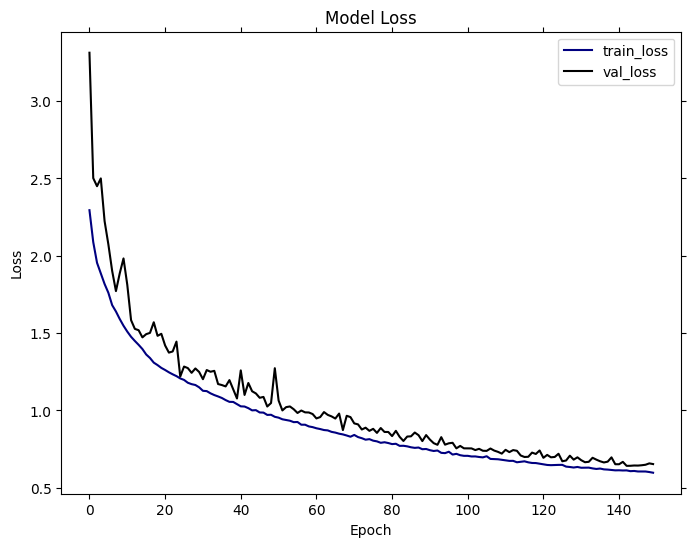

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train_loss', color='navy')
plt.plot(history.history['val_loss'], label='val_loss', color='black')
ax = plt.gca()
ax.tick_params(right=True,top=True)
# ax.spines['bottom'].set_linewidth(1.7)
# ax.spines['left'].set_linewidth(1.7)
# ax.spines['right'].set_linewidth(1.7)
# ax.spines['top'].set_linewidth(1.7)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.5, 3.5])
# plt.xlim([0.0, 300])
plt.legend()
plt.show()

In [52]:
#  predicted test data
y_pred  =  ensemble_model.predict(test_generator)
# y_pred  =  ensemble_model.predict(x_test)
true_labels = test_generator.labels
true_lables = y_test

125/125 [==============================] - 38s 302ms/step


In [53]:
print("Shape of true_labels:", true_labels.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of true_labels: (3979,)
Shape of y_pred: (3979, 12)


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(true_labels, axis=1) if len(true_labels.shape) > 1 else true_labels

# Calculate metrics
accuracy = accuracy_score(true_labels, y_pred_labels)
precision = precision_score(true_labels, y_pred_labels, average='weighted')
recall = recall_score(true_labels, y_pred_labels, average='weighted')
f1 = f1_score(true_labels, y_pred_labels, average='weighted')
roc_auc = roc_auc_score(true_labels, y_pred, multi_class='ovr', average='weighted')  # Adjust for multiclass

conf_matrix = confusion_matrix(true_labels, y_pred_labels)
class_sensitivity = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
class_specificity = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)

sensitivity = np.mean(class_sensitivity)
specificity = np.mean(class_specificity)


print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

for class_idx in range(12):
    class_precision = precision_score(true_labels, y_pred_labels, labels=[class_idx], average=None)
    class_recall = recall_score(true_labels, y_pred_labels, labels=[class_idx], average=None)
    class_f1 = f1_score(true_labels, y_pred_labels, labels=[class_idx], average=None)

    print(f'Class {class_idx} - Precision: {class_precision}, Recall: {class_recall}, F1 Score: {class_f1}')

Sensitivity: 0.9558477045390893
Specificity: 0.9555298819003575
Accuracy: 0.9565217391304348
Precision: 0.9576179982009777
Recall: 0.9565217391304348
F1 Score: 0.9566814874671695
ROC AUC Score: 0.9980599118238745
Class 0 - Precision: [0.92476489], Recall: [0.98333333], F1 Score: [0.95315024]
Class 1 - Precision: [0.98928571], Recall: [0.92333333], F1 Score: [0.95517241]
Class 2 - Precision: [0.91588785], Recall: [0.94230769], F1 Score: [0.92890995]
Class 3 - Precision: [0.96474359], Recall: [0.9204893], F1 Score: [0.94209703]
Class 4 - Precision: [0.92094862], Recall: [0.95884774], F1 Score: [0.93951613]
Class 5 - Precision: [0.95156695], Recall: [0.95428571], F1 Score: [0.95292439]
Class 6 - Precision: [0.9125964], Recall: [0.97260274], F1 Score: [0.94164456]
Class 7 - Precision: [0.99168975], Recall: [0.95721925], F1 Score: [0.97414966]
Class 8 - Precision: [0.93311037], Recall: [0.94897959], F1 Score: [0.94097808]
Class 9 - Precision: [0.98113208], Recall: [0.97066667], F1 Score: [0

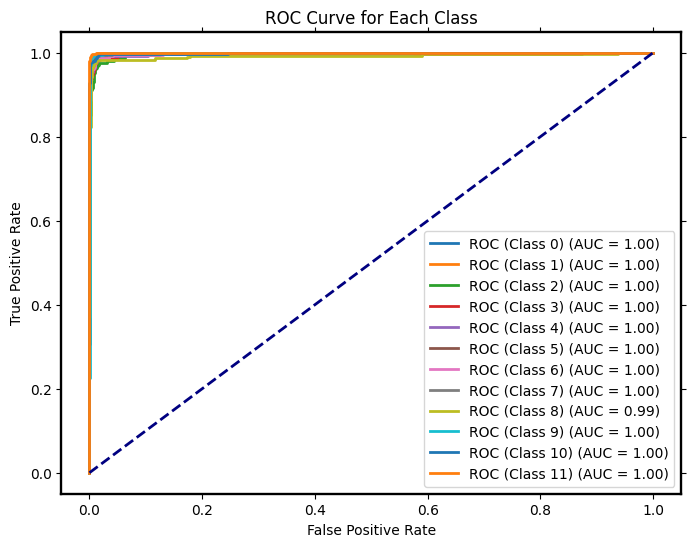

In [56]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(true_labels, classes=np.arange(12))

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(8, 6))
for i in range(12):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=2, label='ROC (Class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

ax = plt.gca()
ax.tick_params(right=True, top=True)
ax.spines['bottom'].set_linewidth(1.7)
ax.spines['left'].set_linewidth(1.7)
ax.spines['right'].set_linewidth(1.7)
ax.spines['top'].set_linewidth(1.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

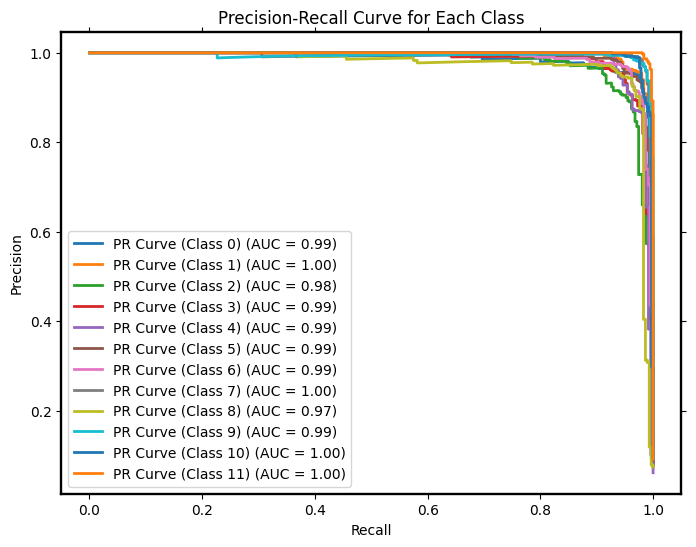

In [57]:

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

y_true_bin = label_binarize(true_labels, classes=np.arange(12))

precision = dict()
recall = dict()
pr_auc = dict()

plt.figure(figsize=(8, 6))
for i in range(12):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

    plt.plot(recall[i], precision[i], lw=2, label='PR Curve (Class {}) (AUC = {:.2f})'.format(i, pr_auc[i]))

ax = plt.gca()
ax.tick_params(right=True, top=True)
ax.spines['bottom'].set_linewidth(1.7)
ax.spines['left'].set_linewidth(1.7)
ax.spines['right'].set_linewidth(1.7)
ax.spines['top'].set_linewidth(1.7)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='lower left')
plt.show()

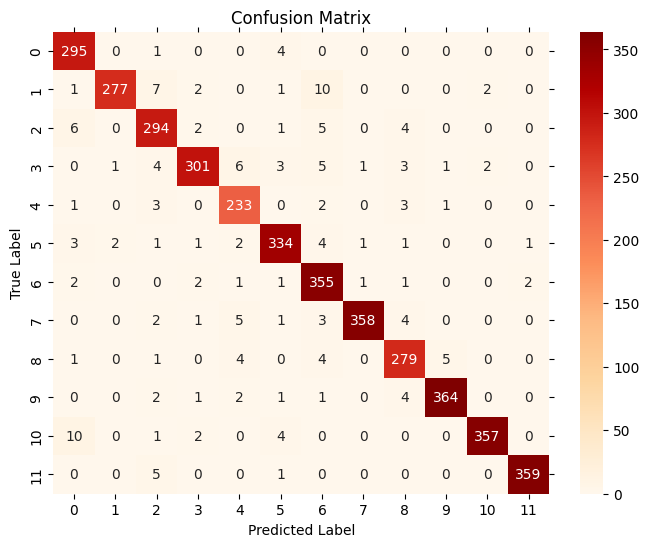

In [58]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd',
            xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))
ax = plt.gca()
ax.tick_params(right=True,top=True)
ax.spines['bottom'].set_linewidth(1.7)
ax.spines['left'].set_linewidth(1.7)
ax.spines['right'].set_linewidth(1.7)
ax.spines['top'].set_linewidth(1.7)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 41ms/step


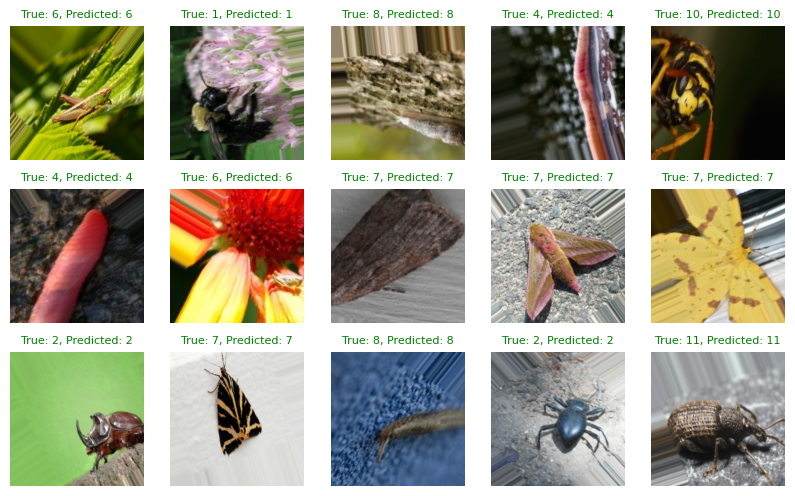

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Number of rows and columns
num_rows = 3  # 3 rows
num_cols = 5  # 5 columns

# Number of images to display
num_images = num_rows * num_cols

# Get random indices from the test dataset
random_indices = np.random.choice(len(test_generator), size=num_images, replace=False)

# Fetch the corresponding images and labels
images, true_labels = [], []
for index in random_indices:
    test_data = test_generator[index]
    images.append(test_data[0][0])  # Assuming test_data is a tuple (images, labels)
    true_labels.append(test_data[1][0])

# Convert one-hot encoded labels to class indices
true_labels_indices = np.argmax(true_labels, axis=1)

# Make predictions on the selected images
predicted_labels = ensemble_model.predict(np.array(images))
predicted_labels_indices = np.argmax(predicted_labels, axis=1)

# Display the randomly selected images along with true and predicted labels
plt.figure(figsize=(10, 6))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(images[i])
    plt.title(f'True: {true_labels_indices[i]}, Predicted: {predicted_labels_indices[i]}',fontsize=8,color='green')
    plt.axis('off')

plt.show()

In [65]:
# Save the model
ensemble_model.save('my_ensemble_model.h5')  # Creates a HDF5 file 'my_ensemble_model.h5'

In [66]:
from tensorflow.keras.models import load_model

# Define your custom layer exactly as you defined it earlier
class EcaLayer(tf.keras.layers.Layer):
    def __init__(self, gamma=2, **kwargs):
        super(EcaLayer, self).__init__(**kwargs)
        self.gamma = gamma

    def build(self, input_shape):
        channels = input_shape[-1]
        self.avg_pool = GlobalAveragePooling2D()
        self.reshape = tf.keras.layers.Reshape((1, 1, channels))
        self.conv = Conv2D(1, kernel_size=1, use_bias=False, kernel_initializer='he_normal', activation='sigmoid')

    def call(self, inputs):
        x = self.avg_pool(inputs)
        x = self.reshape(x)
        x = self.conv(x)
        return inputs * (1 + self.gamma * x)
    
def custom_categorical_crossentropy(y_true, y_pred, label_smoothing=0.1, num_classes=12):
    epsilon = tf.keras.backend.epsilon()
    y_true_smoothed = y_true * (1.0 - label_smoothing) + label_smoothing / num_classes
    y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
    cce = -tf.reduce_sum(y_true_smoothed * tf.math.log(y_pred), axis=-1)
    return tf.reduce_mean(cce)

custom_objects_dict = {
    'EcaLayer': EcaLayer,
    'custom_categorical_crossentropy': custom_categorical_crossentropy
}

# When loading the model, pass a dictionary mapping the custom object name to the custom object itself
loaded_model = load_model('my_ensemble_model.h5', custom_objects=custom_objects_dict)




1/1 [==============================] - 0s 29ms/step


/tmp/ipykernel_37721/1099922779.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


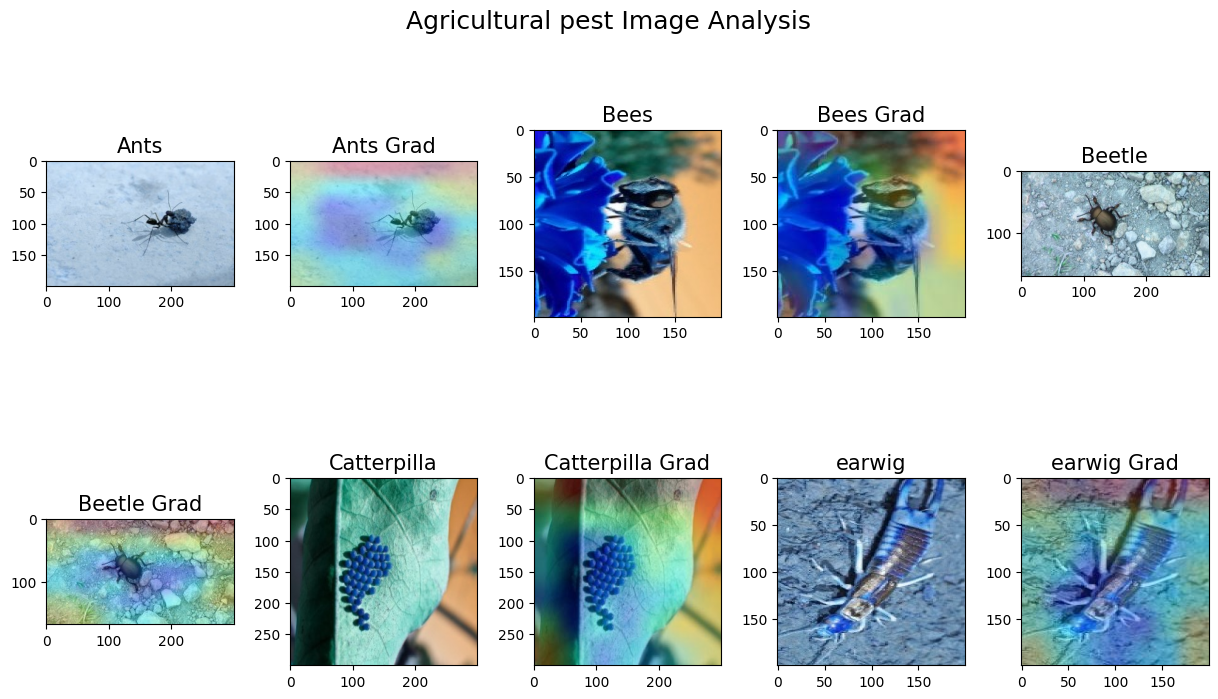

In [68]:
import matplotlib.cm as cm
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

# ... rest of your code ...

list_images_sample = ["/home/featurize/data/new_split_dataset/validation/ants/ants (81).jpg",
"/home/featurize/data/new_split_dataset/validation/bees/bees (119)_rotated.jpg",
"/home/featurize/data/new_split_dataset/validation/beetle/beetle (9).jpg",
"/home/featurize/data/new_split_dataset/validation/catterpillar/catterpillar (92)_resized.jpg",
"/home/featurize/data/new_split_dataset/validation/earwig/earwig (75)_rotated.jpg"]

model_builder = keras.applications.xception.Xception
img_size = (224, 224)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions
imag = []

last_conv_layer_name = "conv2d_149"
# To Get Image into numpy array

def get_img_array(img_path, size):
    img = load_img(img_path, target_size = size) 
    array = img_to_array(img) 
    array = np.expand_dims(array, axis = 0)
    return array

# Top create heatmaps for the samples

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index = None):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Storing Heatmap values into list

covid_noncovid_heatmap = []

for i in list_images_sample:
    img_array = preprocess_input(get_img_array(i, size = img_size))
    model = model1
    model.layers[-1].activation = None
    preds = model.predict(img_array)
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    covid_noncovid_heatmap.append(heatmap)
# To Display GradCAM output for the samples

def save_and_display_gradcam(img_path, heatmap, cam_path = "cam.jpg", alpha = 0.4):
    img = load_img(img_path)
    img = img_to_array(img)

    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = array_to_img(superimposed_img)
    superimposed_img.save(cam_path)
    
    imag.append(cv2.imread(img_path))
    imag.append(cv2.imread("./cam.jpg"))


for i in range(len(list_images_sample)):
    save_and_display_gradcam(list_images_sample[i], covid_noncovid_heatmap[i])
    
    
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title = ""):
    
    fig, myaxes = plt.subplots(figsize = (15, 8), nrows = 2, ncols = ncols, squeeze = False)
    fig.suptitle(main_title, fontsize = 18)
    fig.subplots_adjust(wspace = 0.3)
    fig.subplots_adjust(hspace = 0.3)
    
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize = 15)
        
    plt.show()
    
    

titles_list = ["Ants",'Ants Grad','Bees','Bees Grad','Beetle','Beetle Grad','Catterpilla','Catterpilla Grad','earwig','earwig Grad']

plot_multiple_img(imag, titles_list, ncols = 5, main_title = "Agricultural pest Image Analysis")